In [1]:
#install.packages('package-name',repos='http://cran.us.r-project.org')
#https://cs.hse.ru/data/2015/05/14/1098547089/4._Centrality_Metrics.pdf
library(igraph)
el=read.csv('mcm.mcl',header=FALSE,sep=' ')   #file.choose()) # read the 'el.with.weights.csv' file 
g=graph.data.frame(el)
E(g)$weight<-E(g)$V3



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
EigenCentrality = eigen_centrality(g, directed=TRUE, weights=E(g)$weight)$vector
EigenCentrality = EigenCentrality/max(EigenCentrality)



Warning message in .Call("R_igraph_eigenvector_centrality", graph, directed, scale, :
“At centrality.c:362 :Weighted directed graph in eigenvector centrality”

In [3]:

PageRank= page_rank(g, algo = c('prpack', 'arpack', 'power'), vids = V(g),
     directed = TRUE, damping = 0.85, personalized = NULL, weights = NULL,
     options = NULL)$vector
PageRank=PageRank/max(PageRank)


In [4]:
Betweenness=betweenness(g, directed=TRUE)
Betweenness = Betweenness/max(Betweenness)


In [5]:
Hubs = hub_score(g)$vector


In [6]:
Authorities=authority_score(g)$vector


In [7]:
Closeness = closeness(g, vids = V(g), mode = c( "all"),
  weights = NULL, normalized = TRUE)
Closeness = Closeness/max(Closeness)

In [8]:
Flux = strength(g,vids=V(g),mode=c("all"))
Flux = Flux/max(Flux)

FluxIn = strength(g,vids=V(g),mode=c("in"))
FluxIn = FluxIn/max(FluxIn)

FluxOut = strength(g,vids=V(g),mode=c("out"))
FluxOut = FluxOut/max(FluxOut)


In [9]:
library(Hmisc)
library(ggplot2)
require(reshape2)

df = data.frame(Flux,FluxIn,FluxOut,Closeness,EigenCentrality,PageRank,Betweenness,Authorities,Hubs)

df1 <- melt(df ,  id.vars = 'Flux', variable.name = 'series')
df1$Value = df1$value

df

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units

Loading required package: reshape2


,Flux,FluxIn,FluxOut,Closeness,EigenCentrality,PageRank,Betweenness,Authorities,Hubs
C4PAN1,5.707672e-05,5.818491e-05,5.588620e-05,0.9231311,3.262765e-22,0.011676478,0.0000000000,3.456881e-18,0.000000e+00
C4PAN2,3.279690e-05,3.209368e-05,3.355238e-05,0.9416431,0.000000e+00,0.010086727,0.0000000000,1.199138e-18,0.000000e+00
C4PAN3,4.591107e-05,4.674431e-05,4.501593e-05,0.9252976,0.000000e+00,0.012133510,0.0000000000,1.700334e-17,3.192297e-18
C4PAN5,5.390604e-05,5.236797e-05,5.555840e-05,0.8917132,1.837862e-21,0.008652330,0.0000000000,3.456881e-18,1.324385e-18
C4PAN6,5.042525e-03,5.333462e-03,4.729970e-03,0.2204413,0.000000e+00,0.009810472,0.0000000000,3.844825e-10,1.848689e-15
ETHENO3O,4.473684e-05,5.758603e-05,3.093292e-05,0.9492070,1.084862e-21,0.010608179,0.0000000000,2.954235e-18,2.009125e-15
BUTALO2,1.695172e-04,1.239475e-04,2.184727e-04,0.9690003,2.356001e-21,0.008921771,0.1937019407,7.236591e-14,2.413108e-15
HO1CO3CHO,5.255781e-05,2.924517e-05,7.760263e-05,0.9740202,9.230346e-22,0.009040852,0.0238008056,6.964919e-19,2.717862e-10
NC3OO,3.506802e-05,3.385894e-05,3.636695e-05,0.9385644,9.884799e-22,0.007415554,0.0047601611,6.179336e-14,2.560724e-17
CHOPRNO3,8.951969e-05,5.765425e-05,1.237528e-04,0.9822526,0.000000e+00,0.015777561,0.0655437569,1.493944e-17,2.492894e-10


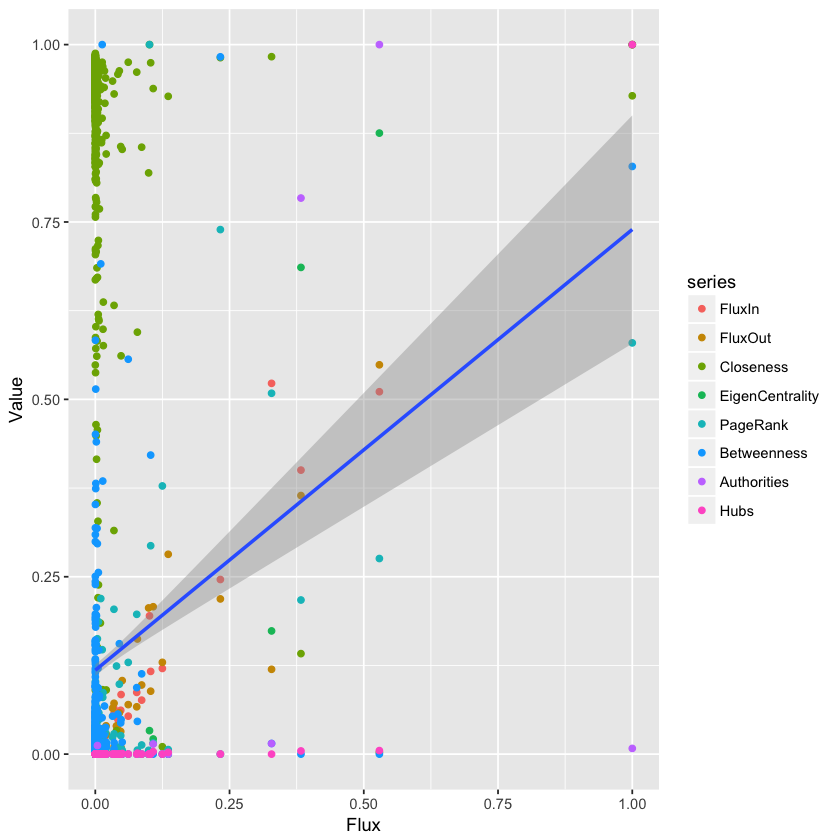

In [10]:
ggplot(df1, aes(Flux,Value)) + geom_point(aes(colour = series))+
geom_smooth(method='lm')



In [11]:
write.csv(df, file = "centrality.csv")

In [12]:
edge_density(g, loops = FALSE)

[1] 0.003420156